In [25]:
import pandas as pd
import numpy as np
import hvplot.pandas

In [92]:
# reading file (cleaned)
original_df = pd.read_csv("../PySpark_SQL/output_csv/Perth_housing_ML.csv")
original_df

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,18300,1800,0.828339,15.0
1,Wandi,365000,351,139,26900,4900,5.524324,6.0
2,Camillo,287000,719,86,22600,1900,1.649178,36.0
3,Bellevue,255000,651,59,17900,3600,1.571401,65.0
4,Lockridge,325000,466,131,11200,2000,1.514922,18.0
...,...,...,...,...,...,...,...,...
27876,White Gum Valley,720000,761,150,15000,2300,0.709641,44.0
27877,Secret Harbour,655000,769,226,51300,8700,1.921113,20.0
27878,Bertram,380000,546,191,32700,1400,1.413546,NaN
27879,Redcliffe,520000,494,130,8500,3500,2.530817,5.0


In [93]:
# ensure no NaN data in df
original_df = original_df.dropna().reset_index(drop = True)
original_df

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,18300,1800,0.828339,15.0
1,Wandi,365000,351,139,26900,4900,5.524324,6.0
2,Camillo,287000,719,86,22600,1900,1.649178,36.0
3,Bellevue,255000,651,59,17900,3600,1.571401,65.0
4,Lockridge,325000,466,131,11200,2000,1.514922,18.0
...,...,...,...,...,...,...,...,...
26256,Subiaco,1460000,222,213,3200,1000,1.468962,6.0
26257,White Gum Valley,720000,761,150,15000,2300,0.709641,44.0
26258,Secret Harbour,655000,769,226,51300,8700,1.921113,20.0
26259,Redcliffe,520000,494,130,8500,3500,2.530817,5.0


## Unsupervised Learning using KMeans
---

In [94]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
# remove columns before scaling data
df = original_df.drop(columns= ["SUBURB", "FLOOR_AREA", "NEAREST_STN_DIST", "NEAREST_SCH_DIST", "PROPERTY_AGE"])
df

,PRICE,LAND_AREA,CBD_DIST
0,565000,600,18300
1,365000,351,26900
2,287000,719,22600
3,255000,651,17900
4,325000,466,11200
...,...,...,...
26256,1460000,222,3200
26257,720000,761,15000
26258,655000,769,51300
26259,520000,494,8500


In [96]:
# using StandardScaler to normalize the data
scaled_data = StandardScaler().fit_transform(df)

In [97]:
# Create a DataFrame with the scaled data 
df_scaled = pd.DataFrame(scaled_data, columns= df.columns[:], index= df.index)

# Display sample data
df_scaled.head()

,PRICE,LAND_AREA,CBD_DIST
0,-0.220409,-0.120967,-0.106280
1,-0.783822,-0.144277,0.652194
2,-1.003554,-0.109828,0.272957
3,-1.093700,-0.116193,-0.141558
4,-0.896505,-0.133511,-0.732463


In [98]:
# Create a list with the number of k-values from 1 to 11
k_Values = list(np.arange(1, 12))
k_Values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [99]:
# function for calculate inertia
def cal_inertia(df, k_list):
    # Create an empty list to store the inertia values
    inertia = []
    # Create a for loop to compute the inertia with each possible value of k
    for i in k_list:
        # Create a KMeans model using the loop counter for the n_clusters
        k_mean = KMeans(n_clusters= i, random_state= 0)
        # Fit the model to the data using `df_market_data_scaled`
        k_mean.fit(df)
        # Append the model.inertia_ to the inertia list
        inertia.append(k_mean.inertia_)
    return inertia

In [100]:
# Create an empty list to store the inertia values
inertia = cal_inertia(df_scaled, k_Values) # calculate inertia

print(inertia)


[78782.99999999997, 58061.34151750963, 40917.11768827871, 26336.450311638844, 21405.65389248282, 17484.692966173658, 14612.002950024253, 12695.61062241267, 11350.092598816624, 10118.743951376757, 9041.563828863515]


In [101]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_Values, "inertia": inertia})
elbow_df.head()

,k,inertia
0,1,78783.000000
1,2,58061.341518
2,3,40917.117688
3,4,26336.450312
4,5,21405.653892


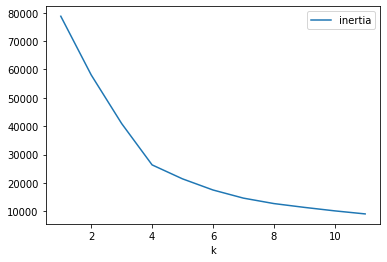

In [102]:
# Plot a line chart with all the inertia values computed with 
elbow_df.plot(x= "k", y= "inertia")

In [103]:
def clustering(num_cluster, df):
    # Initialise the K-Means model using the best value for k
    model = KMeans(n_clusters= num_cluster, random_state= 0) 
    # Fit the K-Means model using the original data
    model.fit(df)
    # Predict the clusters to group the cryptocurrencies using the original data
    predictions = model.predict(df)
    
    return predictions

In [105]:
predictions = clustering(4, df_scaled) # getting clustering results
# Print the resulting array of cluster values.
print(predictions)

[2 0 2 ... 0 2 2]


In [106]:
# Create a copy of the DataFrame
house_cluster_df = original_df.copy()
house_cluster_df.head()

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,18300,1800,0.828339,15.0
1,Wandi,365000,351,139,26900,4900,5.524324,6.0
2,Camillo,287000,719,86,22600,1900,1.649178,36.0
3,Bellevue,255000,651,59,17900,3600,1.571401,65.0
4,Lockridge,325000,466,131,11200,2000,1.514922,18.0


In [107]:
# Add a new column to the DataFrame with the predicted clusters
house_cluster_df["predicted clusters"] = predictions

# Display sample data
house_cluster_df

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE,predicted clusters
0,South Lake,565000,600,160,18300,1800,0.828339,15.0,2
1,Wandi,365000,351,139,26900,4900,5.524324,6.0,0
2,Camillo,287000,719,86,22600,1900,1.649178,36.0,2
3,Bellevue,255000,651,59,17900,3600,1.571401,65.0,2
4,Lockridge,325000,466,131,11200,2000,1.514922,18.0,2
...,...,...,...,...,...,...,...,...,...
26256,Subiaco,1460000,222,213,3200,1000,1.468962,6.0,1
26257,White Gum Valley,720000,761,150,15000,2300,0.709641,44.0,2
26258,Secret Harbour,655000,769,226,51300,8700,1.921113,20.0,0
26259,Redcliffe,520000,494,130,8500,3500,2.530817,5.0,2


In [108]:
house_cluster_df.hvplot.scatter(x= "CBD_DIST", y= "PRICE", by= "predicted clusters", size= 1)
# plt.scatter(house_cluster_df["LAND_AREA"], house_cluster_df["PRICE"], color= house_cluster_df["predicted clusters"])

:NdOverlay   [predicted clusters]
   :Scatter   [CBD_DIST]   (PRICE)

In [111]:
count_grp = house_cluster_df.groupby("predicted clusters")
# create a dataframe for easier visualise data
count_grp_df = count_grp["PRICE"].count().reset_index()
count_grp_df = count_grp_df.rename(columns= {"PRICE": "count"})
count_grp_df

,predicted clusters,count
0,0,7073
1,1,3575
2,2,15589
3,3,24


In [110]:
median_grp = house_cluster_df.groupby("predicted clusters").median()
median_grp

,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
predicted clusters,,,,,,,
0,436000.0,672.0,173.0,32900.0,3300.0,1.566972,16.0
1,1265000.0,704.0,248.0,9100.0,2400.0,1.221844,26.0
2,527000.0,614.0,156.0,14500.0,3200.0,1.259451,24.0
3,997500.0,254766.0,220.0,42350.0,25450.0,10.873060,21.5


In [112]:
mean_grp = house_cluster_df.groupby("predicted clusters").mean()
mean_grp

,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
predicted clusters,,,,,,,
0,4.815417e+05,3240.986003,181.332956,34725.618549,6192.779584,2.492724,20.110703
1,1.360796e+06,2330.029930,254.643916,10556.022937,2928.975664,1.430604,35.933706
2,5.513722e+05,742.093784,165.210469,14613.963436,3715.954648,1.427246,28.252935
3,1.083854e+06,286259.958333,234.041667,43887.500000,23212.500000,11.435447,30.500000


In [113]:
# group 5 clusters and suburb together to understand the pattern in each suburb
grp = house_cluster_df.groupby(["SUBURB", "predicted clusters"])
grp_count = grp["PRICE"].count()

# reformat the table to a readable form
suburb_cluster_count_df = grp_count.unstack()
suburb_cluster_count_df = suburb_cluster_count_df.reset_index()

# fill up the NaN with 0
suburb_cluster_count_df = suburb_cluster_count_df.fillna(0)

# sum up all columns 
suburb_cluster_count_df["total"] = suburb_cluster_count_df.sum(axis = "columns")
# drop all axis that are less than 5 counts in total
suburb_cluster_count_df = suburb_cluster_count_df.loc[suburb_cluster_count_df["total"] >= 5, :]

suburb_cluster_count_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


predicted clusters,SUBURB,0,1,2,3,total
0,Alexander Heights,0.0,0.0,107.0,0.0,107.0
1,Alfred Cove,0.0,31.0,67.0,0.0,98.0
2,Alkimos,90.0,0.0,0.0,0.0,90.0
3,Anketell,5.0,3.0,0.0,0.0,8.0
4,Applecross,0.0,53.0,15.0,0.0,68.0
...,...,...,...,...,...,...
314,Wooroloo,19.0,0.0,0.0,1.0,20.0
315,Wungong,8.0,1.0,0.0,0.0,9.0
316,Yanchep,93.0,0.0,0.0,0.0,93.0
317,Yangebup,0.0,0.0,99.0,0.0,99.0


In [114]:
# change to percentage for the whole dataframe
for n in range(4):
    suburb_cluster_count_df[n] = suburb_cluster_count_df[n]/suburb_cluster_count_df["total"]

# drop the total column
suburb_cluster_percent_df = suburb_cluster_count_df.drop(columns= "total")
suburb_cluster_percent_df.columns = ["Suburb", "cluster-1", "cluster-2", "cluster-3", "cluster-4"]

# reformat dataframe
suburb_cluster_percent_df.style.format({"cluster-1" : "{:.2%}", "cluster-2": "{:.2%}", "cluster-3": "{:.2%}", "cluster-4": "{:.2%}"})

,Suburb,cluster-1,cluster-2,cluster-3,cluster-4
0,Alexander Heights,0.00%,0.00%,100.00%,0.00%
1,Alfred Cove,0.00%,31.63%,68.37%,0.00%
2,Alkimos,100.00%,0.00%,0.00%,0.00%
3,Anketell,62.50%,37.50%,0.00%,0.00%
4,Applecross,0.00%,77.94%,22.06%,0.00%
5,Ardross,0.00%,61.90%,38.10%,0.00%
6,Armadale,98.18%,1.82%,0.00%,0.00%
7,Ascot,0.00%,19.00%,81.00%,0.00%
8,Ashby,66.67%,0.00%,33.33%,0.00%
9,Ashfield,0.00%,4.05%,95.95%,0.00%


In [116]:
# output dataframe
suburb_cluster_percent_df.to_csv("./output/suburb_clustering.csv", index= False)

# PCA
----


In [43]:
pca = PCA(n_components= 5)

In [45]:
house_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= df.index)
house_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.052681,-0.522298,-0.904257,-0.655067,0.046476
1,0.171052,1.946224,-0.658236,1.513087,0.439155
2,-2.218479,1.026423,0.214049,0.038489,-1.125493
3,-3.415181,0.974759,0.900454,0.013023,0.723011
4,-1.237309,0.204068,-0.262325,-1.378940,-0.766956


In [46]:
pca.explained_variance_ratio_

array([0.24112608, 0.19619987, 0.12254548, 0.0909759 , 0.08879469])

In [48]:
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= df.index)
house_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.052681,-0.522298,-0.904257,-0.655067,0.046476
1,0.171052,1.946224,-0.658236,1.513087,0.439155
2,-2.218479,1.026423,0.214049,0.038489,-1.125493
3,-3.415181,0.974759,0.900454,0.013023,0.723011
4,-1.237309,0.204068,-0.262325,-1.378940,-0.766956


In [49]:
kValues = list(np.arange(1, 12))
kValues

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [50]:
inertia_pca = cal_inertia(house_pca_df, k_Values) # calculate inertia for pca data
print(inertia_pca)

[237402.15852953272, 190495.55903051217, 159471.68554030827, 133252.53267125058, 120884.484553788, 112336.5372469319, 104414.72802925765, 97615.19379479224, 91844.05109614063, 87345.6319438846, 83262.23958298034]


In [51]:
elbow_pca_df = pd.DataFrame({"k": kValues, "inertia": inertia_pca})
elbow_pca_df.head()

,k,inertia
0,1,237402.158530
1,2,190495.559031
2,3,159471.685540
3,4,133252.532671
4,5,120884.484554


In [52]:
PCA_elbow = elbow_pca_df.hvplot(x= "k", y= "inertia")
PCA_elbow


:Curve   [k]   (inertia)

In [116]:
predictions_PCA  = clustering(5, house_pca_df) 
print(predictions_PCA)

[2 0 4 ... 0 4 4]


In [117]:
# Create a copy of the DataFrame with the PCA data
house_pca_cluster_df = house_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
house_pca_cluster_df["predicted clusters"] = predictions_PCA

# Display sample data
house_pca_cluster_df.head()

,PC1,PC2,PC3,PC4,PC5,predicted clusters
0,-0.052681,-0.522298,-0.904257,-0.655067,0.046476,2
1,0.171052,1.946224,-0.658236,1.513087,0.439155,0
2,-2.218479,1.026423,0.214049,0.038489,-1.125493,4
3,-3.415181,0.974759,0.900454,0.013023,0.723011,4
4,-1.237309,0.204068,-0.262325,-1.378940,-0.766956,2


In [118]:
house_pca_cluster_df.hvplot.scatter(x= "PC1", y= "PC2", 
                                 by= "predicted clusters", size = 1
                                 )

:NdOverlay   [predicted clusters]
   :Scatter   [PC1]   (PC2)

## Supervised Machine Learning
---